In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns


In [5]:
datafile = pd.read_csv("../data/raw/forestfires.csv")

In [6]:
datafile.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<Axes: ylabel='area'>

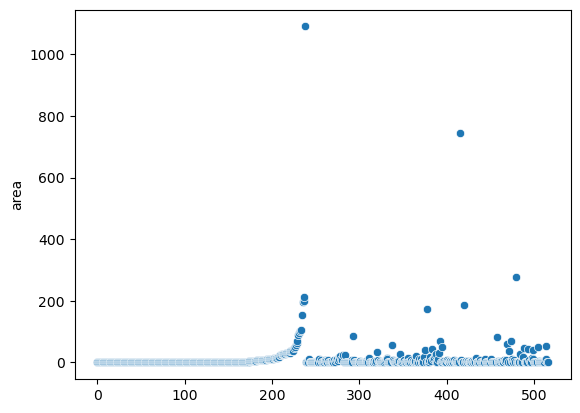

In [27]:
sns.scatterplot(datafile["area"])

<Axes: xlabel='ISI', ylabel='Count'>

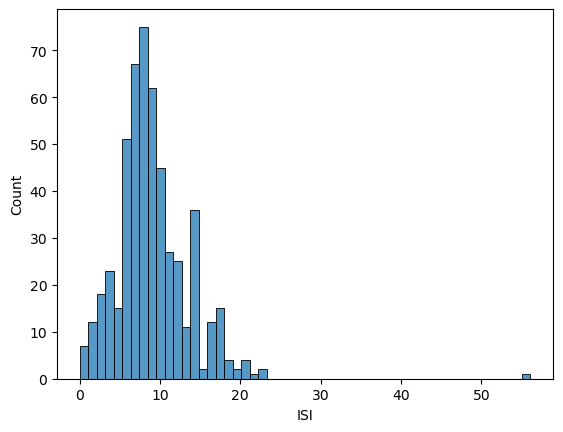

In [9]:
sns.histplot(datafile["ISI"])


<Axes: xlabel='month', ylabel='Count'>

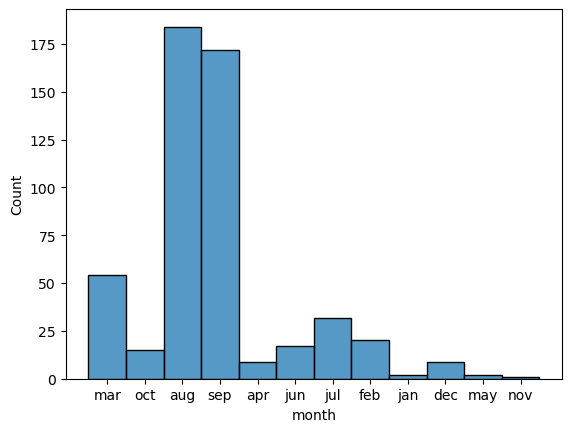

In [10]:
sns.histplot(datafile["month"])


<Axes: ylabel='rain'>

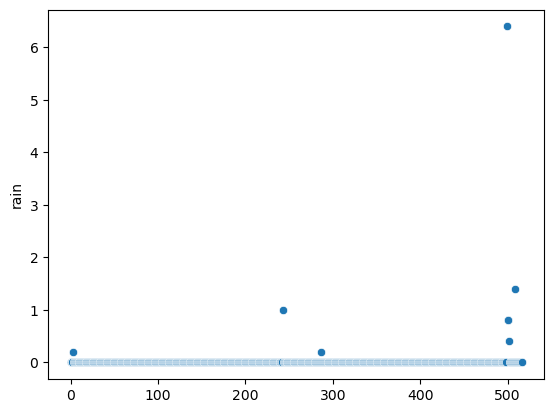

In [23]:
sns.scatterplot(datafile["rain"])

<Axes: xlabel='temp', ylabel='Count'>

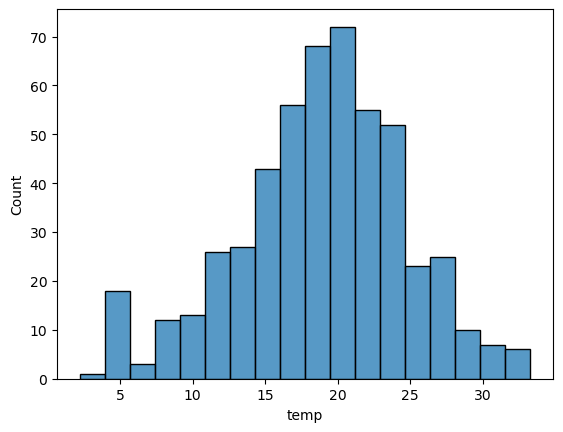

In [14]:
sns.histplot(datafile["temp"])

<Axes: xlabel='RH', ylabel='Count'>

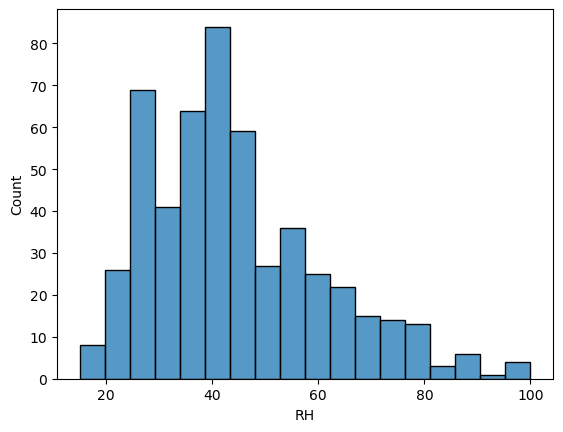

In [24]:
sns.histplot(datafile["RH"])

<Axes: xlabel='area', ylabel='month'>

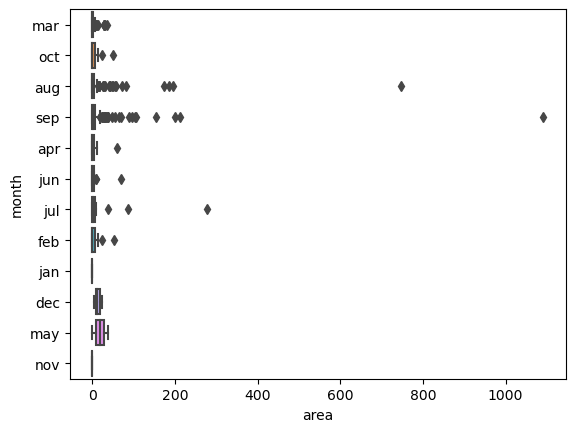

In [34]:
sns.boxplot(y=datafile["month"], x= datafile["area"])

<Axes: xlabel='temp', ylabel='month'>

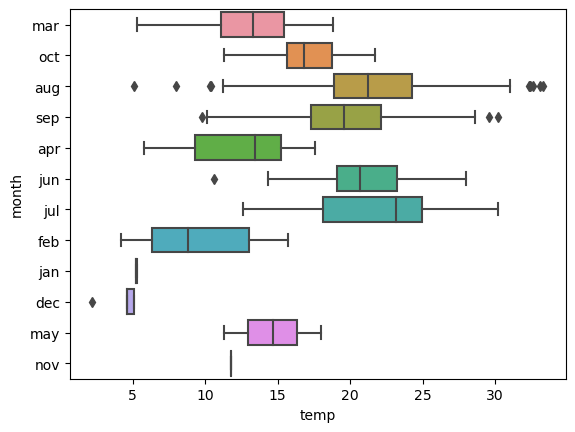

In [15]:
sns.boxplot(y=datafile["month"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='DMC'>

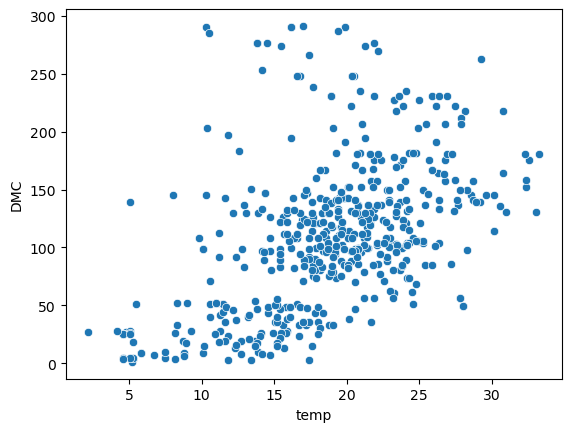

In [16]:
sns.scatterplot(y=datafile["DMC"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='area'>

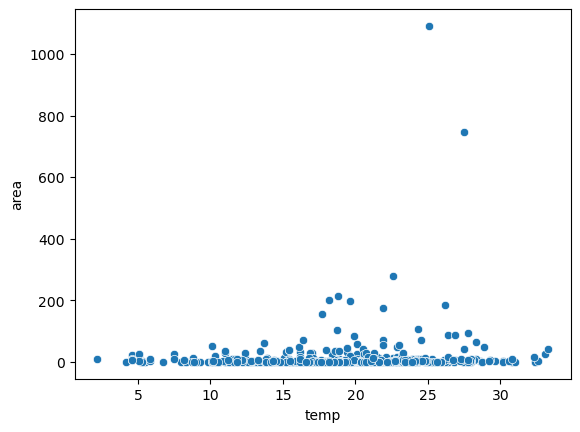

In [32]:
sns.scatterplot(y=datafile["area"], x= datafile["temp"])

<Axes: xlabel='RH', ylabel='area'>

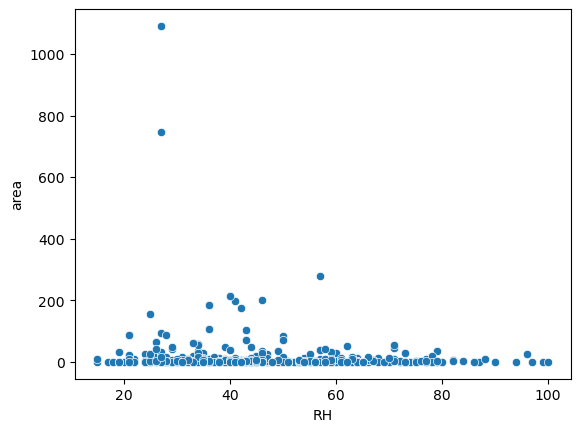

In [33]:
sns.scatterplot(y=datafile["area"], x= datafile["RH"])

<Axes: xlabel='temp', ylabel='ISI'>

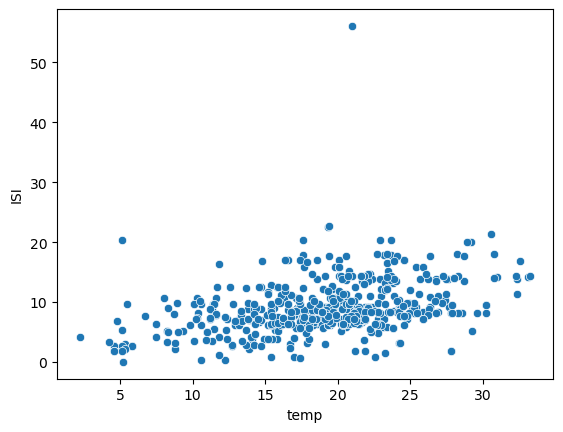

In [19]:
sns.scatterplot(y=datafile["ISI"], x= datafile["temp"])

<Axes: xlabel='temp', ylabel='DC'>

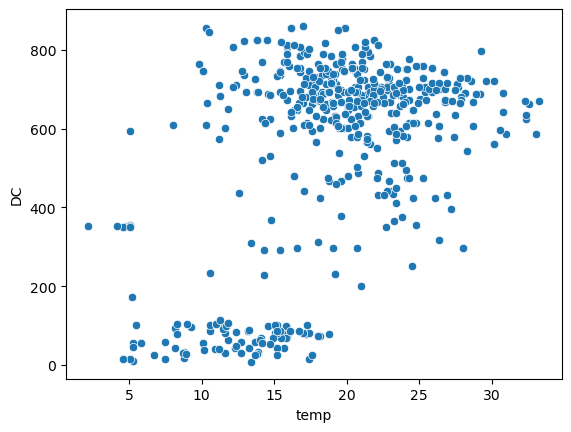

In [20]:
sns.scatterplot(y=datafile["DC"], x= datafile["temp"])